In [1]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, roc_curve, recall_score, roc_auc_score

In [4]:
# import dataset 
diabetes= pd.read_csv("C:/Users/kezen/OneDrive/Documents/Microsoft/data/diabetes.csv", delimiter=",", header="infer")

# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
x = diabetes[features].values 
y =diabetes[label].values

# split data 70% to training and test dataset: 70% to training and 30% to testing dataset 
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100) # random_state ensures reproducibility

# fit logistic regression model 
model = DecisionTreeClassifier(random_state= 100).fit(x_train, y_train)

# make predictions on the test data set 
predictions = model.predict(x_test)

# create dataframe of actual vs predicted values 
df = pd.DataFrame({
  "actual_values": y_test,
  "predicted_values": predictions  
})
print(df.head(10))


   actual_values  predicted_values
0              0                 0
1              0                 0
2              0                 0
3              0                 0
4              0                 0
5              1                 1
6              0                 1
7              0                 0
8              1                 1
9              0                 0


In [5]:
# evaluate model performance 
accuracy = np.round(accuracy_score(y_test, predictions), 2)
recall = np.round(recall_score(y_test, predictions), 2)
precision = np.round(precision_score(y_test, predictions), 2)
print(f"\nAccuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")



Accuracy: 0.9
Recall: 0.85
Precision: 0.84


Compared to the logistics regression, the decision tree model performs markedly better 

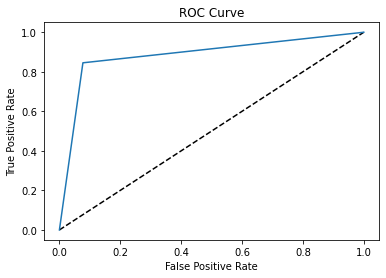

In [8]:
# plot the ROC Curve
#ROC Curve shows the curve of the true and false positive rates.

from sklearn.metrics import roc_curve, roc_auc_score
# get probailities of th predictions 
y_scores  = model.predict_proba(x_test)

# calculate the ROC Curve 
fpr, tpr, thresholds = roc_curve(y_true= y_test, y_score= y_scores[:,1])
# plot the 50% diagonal line 
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()